In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from models.RegressãoPolinomial.model import PolynomialRegression, DataNormalizer
from models.RegressãoPolinomial.model_l2 import PolynomialRegressionL2

In [2]:
df = pd.read_csv(r"C:\Users\jorge\OneDrive\Área de Trabalho\pattern-recognition-RP\data\boston.csv", header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
X, y = df.iloc[:, :13], df.iloc[:, 13]

In [5]:
X.shape, y.shape

((506, 13), (506,))

In [6]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [9]:
rmse_test_list = []
rmse_train_list = []

In [11]:
for p in range(1,12):
    model = PolynomialRegression(number_polynomial=p)
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

    rmse_test_list.append(rmse_test)
    rmse_train_list.append(rmse_train)

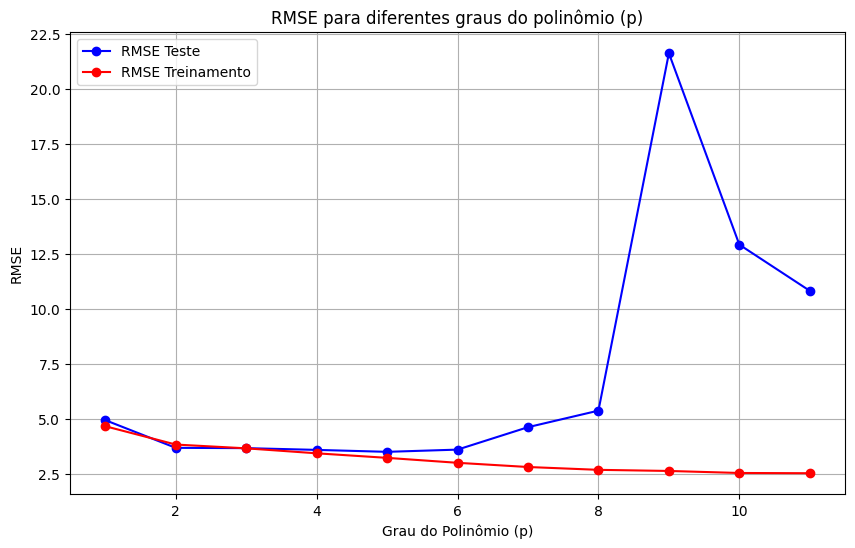

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), rmse_test_list, label='RMSE Teste', marker='o', linestyle='-', color='blue')
plt.plot(range(1, 12), rmse_train_list, label='RMSE Treinamento', marker='o', linestyle='-', color='red')

plt.title('RMSE para diferentes graus do polinômio (p)')
plt.xlabel('Grau do Polinômio (p)')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

### MESMOS TESTES DO MODELO COM REGULARIZAÇÃO L2

In [21]:
rmse_test_list_l2 = []
rmse_train_list_l2 = []

In [22]:
for p in range(1,12):
    model = PolynomialRegressionL2(number_polynomial=p)
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

    rmse_test_list_l2.append(rmse_test)
    rmse_train_list_l2.append(rmse_train)

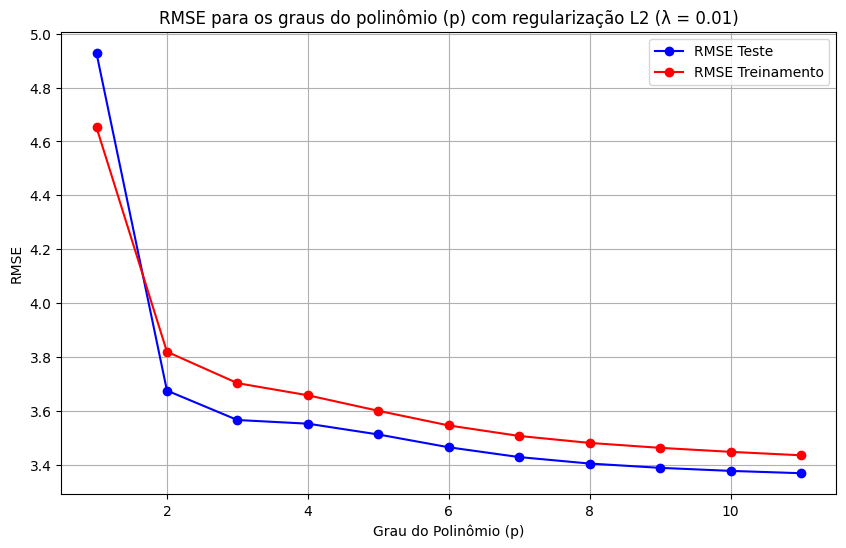

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), rmse_test_list_l2, label='RMSE Teste', marker='o', linestyle='-', color='blue')
plt.plot(range(1, 12), rmse_train_list_l2, label='RMSE Treinamento', marker='o', linestyle='-', color='red')

plt.title('RMSE para os graus do polinômio (p) com regularização L2 (λ = 0.01)')
plt.xlabel('Grau do Polinômio (p)')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()